# Part.1

## Chapter.1 한 눈에 보는 머신러닝

##### 설정

In [4]:
# 파이썬 2와 파이썬 3 지원
from __future__ import division, print_function, unicode_literals

# 공통
import numpy as np
import os

# 일관된 출력을 위해 유사난수 초기화
np.random.seed(42)

# 맷플롯립 설정
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# 한글출력
matplotlib.rc('font', family='Ebrima')
plt.rcParams['axes.unicode_minus'] = False

# 그림을 저장할 폴드
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "fundamentals"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# SciPy 이슈 #5998에 해당하는 경고를 무시합니다(https://github.com/scipy/scipy/issues/5998).
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

### 예제 1-1 사이킷런을 이용한 선형 모델의 훈련과 실행

#### 데이터 적재


In [5]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
import sklearn.linear_model

In [6]:
import os
datapath = os.path.join("C:/","Users/","qual9/","머신러닝_핸즈온/","datasets/", "lifesat/", "")

In [7]:
oecd_bli = pd.read_csv(datapath + "oecd_bli_2015.csv")

In [8]:
gdp_per_capita = pd.read_csv("C:/Users/qual9/머신러닝_핸즈온/datasets/lifesat/gdp_per_capita.csv")
gdp_per_capita.rename(columns={"2015":"GDP per capita"}, inplace = True)
gdp_per_capita.set_index("Country", inplace =True)

In [9]:
oecd_bli.set_index("Country", inplace =True)
oecd_bli.head(2)

,Unnamed: 1,Unnamed: 2,Dwellings without basic facilities,Housing expenditure,Rooms per person,Household net adjusted disposable income,Household net wealth,Labour market insecurity,Employment rate,Long-term unemployment rate,...,Water quality,Stakeholder engagement for developing regulations,Voter turnout,Life expectancy,Self-reported health,Life satisfaction,Feeling safe walking alone at night,Homicide rate,Employees working very long hours,Time devoted to leisure and personal care
Country,,,,,,,,,,,,,,,,,,,,,
Australia,NaN,NaN,..,20,..,32759,427064,5.4,73.0,1.31,...,93.0,2.7,91.0,82.5,85,7.3,63.5,1.1,13.04,14.35
Austria,NaN,NaN,0.9,21,1.6,33541,308325,3.5,72.0,1.84,...,92.0,1.3,80.0,81.7,70,7.1,80.6,0.5,6.66,14.55


In [10]:
full_country_stats = pd.merge(left = oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
full_country_stats.sort_values(by="GDP per capita", inplace=True)
remove_indices = [0, 1, 6, 8, 33, 34, 35]
keep_indices = list(set(range(36)) - set(remove_indices))

country_stats = full_country_stats[["GDP per capita", '  Life satisfaction']].iloc[keep_indices]
country_stats.sort_values(by="Country", inplace=True)
country_stats

,GDP per capita,Life satisfaction
Country,,
Austria,-0.132,7.1
Belgium,-0.247,6.9
Chile,-0.208,6.5
Colombia,-0.185,6.3
Estonia,-0.146,5.7
Estonia,-0.284,5.7
Estonia,-0.161,5.7
France,-0.216,6.5
Germany,-0.054,7.0


#### 데이터 준비

In [17]:
X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["  Life satisfaction"]]

array([['-0.132'],
       ['-0.247'],
       ['-0.208'],
       ['-0.185'],
       ['-0.146'],
       ['-0.284'],
       ['-0.161'],
       ['-0.216'],
       ['-0.054'],
       ['-0.144'],
       ['-0.272'],
       ['-0.315'],
       ['-0.038'],
       ['-0.3'],
       ['-0.151'],
       ['-0.354'],
       ['-0.379'],
       ['-0.163'],
       ['-0.315'],
       ['-0.16'],
       ['-0.053'],
       ['-0.323'],
       ['-0.333'],
       ['-0.058'],
       ['-0.32'],
       ['-0.2'],
       ['-0.346'],
       ['-0.315'],
       ['-0.21']], dtype=object)

#### 데이터 시각화

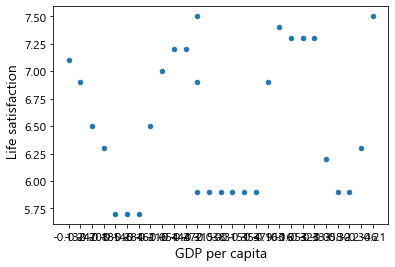

In [15]:
ax = country_stats.plot(kind='scatter',x="GDP per capita", y="  Life satisfaction")
plt.show()

#### 선형 모델 선택

In [16]:
model = sklearn.linear_model.LinearRegression()

#### 모델 훈련

In [18]:
model.fit(X,y)

LinearRegression()

#### 키프로스에 대한 예측

In [19]:
X_new = [[22587]] #키프로스 1인당 GDP
print(model.predict(X_new))

[[11851.23659881]]


### 1.6 연습문제

1. 머신러닝을 어떻게 정의할 수 있나요?
- 머신러닝이란 컴퓨터가 학습을 하도록 만드는 것이다.

2. 머신러닝이 도움을 줄 수 있는 문제 유형 네 가지를 말해보세요.
- 스팸메일분류, 음성인식, 군집화, 클래스 예측

3. 레이블된 훈련 세트란 무엇인가요?
- 정답 레이블을 갖고 있는 세트

4. 가장 널리 사용되는 지도 학습 작업 두 가지는 무엇인가요?
- 회귀와 분류

5. 보편적인 비지도 학습 작업 네 자지는 무엇인가요?
- 군집, 시각화, 차원 축소, 연관 규칙 학습 

6. 사전 정보가 없는 여러 지형에서 로봇을 걸어가게 하려면 어떤 종류의 머신러닝 알고리즘을 사용할 수 있나요?
- 강화학습

7. 고객을 여러 그룹으로 분할하려면 어떤 알고리즘을 사용해야 하나요?
- 군집화 알고리즘 사용 

8. 스팸 감지의 문제는 지도 학습과 비지도 학습 중 어떤 문제로 볼 수 있나요?
- 지도학습 

9. 온라인 학습 시스템이 무엇인가요?
- 온라인 학습 시스템은 점진적으로 학습하는 시스템으로 새로운 데이터가 들어오면 그 전의 데이터를 버린다. 

10. 외부 메모리 학습이 무엇인가요?
- 컴퓨터 한 대의 메인 메모리에 들어갈 수 없는 아주 큰 데이터셋을 학습하는 시스템으로 온라인 학습 알고리즘을 사용하는 학습이다.

11. 예측을 하기 위해 유사도 측정에 의존하는 학습 알고리즘은 무엇인가요?
- 사례 기반 학습

12. 모델 파라미터와 학습 알고리즘의 하이퍼파라미터 사이에는 어떤 차이가 있나요?
- 모델 파라미터는 알고리즘이 학습을하며 찾는 최적의 파라미터이다. 학습 알고리즘의 하이퍼파라미터는 훈련 전에 미리 정해놓는 파라미터이다..

13. 모델 기반 알고리즘이 찾는 것은 무엇인가요? 성공을 위해 이 알고리즘이 사용하는 가장 일반적인 전략은 무엇인가요? 예측은 어떻게 만드나요?
- 모델 기반 알고리즘이 찾는 것은 모델 파라미터의 최적값이다. 훈련 데이터를 이용하여 시스템을 훈련시킨 후 검증데이터를 통해 최적의 파라미터를 찾아낸 뒤 테스트 데이터를 이용하여 모델을 결정한다.

14. 머신러닝의 주요 도전 과제는 무엇인가요?
- 부족한 수의 데이터, 낮은 품질의 데이터, 무의미한 특성, 과소적합 된 간단한 모델, 과대적합된 복잡한 모델 

15. 모델이 훈련 데이터에서의 성능은 좋지만 새로운 샘플에서의 일반화 성능이 나쁘다면 어떤 문제가 있는 건가요? 가능한 해결책 세 가지는 무엇인가요?
- 과대적합의 문제. 1) 데이터 수 증가시키기 2) 모델을 단순화 시키기 3) 잡음 감소시키기

16. 테스트 세트가 무엇이고 왜 사용해야 하나요?
- 테스트 세트는 훈련 데이터에서 20%정도 떼어는 데이터 세트이다. 모델이 과적합되는 것을 막기 위해 사용해야한다.

17. 검증 세트의 목적은 무엇인가요?
- 검증 세트는 다양한 모델들을 평가하고 가장 적합한 모델을 선택하기 위해서 사용한다. 

18. 훈련-개발 세트가 무엇인가요? 언제 필요하고 어떻게 사용해야 하나요?
- 훈련-개발 세트는 훈련 데이터 중 일부를 떼어 만든 데이터 세트이다. 훈련-개발 세트를 제외한 훈련데이터로 모델을 훈련하고 훈련-개발 세트로 평가를한다. 

19. 테스트 세트를 사용해 하이퍼파라미터를 튜닝하면 어떤 문제가 생기나요?
- 과적합 될 수 있다.